In [133]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
from scipy.stats import mode


from sklearn.preprocessing import scale, minmax_scale, robust_scale

matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic')

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split, GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix

# 회귀분석
from statsmodels.formula.api import ols

# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# 나무 구조 시각화  
from sklearn.tree import plot_tree

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse

# 탐색적 분석

## 1. 데이터 불러오기

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv("C:/Users/Myung-jin/21aibigdata/bigdata/AIR_POLLUTION.csv",  
                     parse_dates = ["MeasDate"])
df_raw.head(30)

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92
5,2019-07-06,29.0,0.043,0.032,0.5,0.003,29.87,0.00,1.54,80,39.7,993.7,0.0,3.50
6,2019-07-07,16.0,0.043,0.014,0.3,0.002,26.86,0.00,2.27,83,43.5,997.5,0.0,6.58
7,2019-07-08,10.0,0.035,0.019,0.3,0.002,25.13,0.00,1.96,76,45.3,997.9,0.0,6.58
8,2019-07-09,10.0,0.033,0.019,0.4,0.002,25.11,0.00,1.84,81,46.3,996.7,0.0,4.42
9,2019-07-10,9.0,0.027,0.019,0.3,0.002,22.79,0.82,2.13,80,61.0,997.3,0.0,8.29


## 2. 데이터 특성 확인하기

#### 데이터 속성 확인

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    int64         
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 40.2 KB


#### 행열 개수

In [4]:
df_raw.shape

(366, 14)

> 자료 수(행) 366개, 변수(열) 14개로 된 데이터셋이며, 설명 변수는 현재 다 연속형 변수로 인식된다.

#### 기술통계량 확인 - 이상치 판단

In [5]:
df_raw.describe()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000000,365.000000,365.000000,311.000000,365.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,33.421918,0.023600,0.026814,0.517042,0.003033,13.863798,0.381639,2.225301,209.450820,60.295082,1005.848907,0.022951,5.064016
std,15.937983,0.011896,0.010271,0.152820,0.000632,9.830280,1.122127,0.723171,70.735018,14.534983,8.126823,0.222361,2.986119
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.492500,0.000000,1.722500,160.250000,49.650000,999.400000,0.000000,2.510000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,14.000000,0.000000,2.095000,221.000000,61.050000,1006.450000,0.000000,5.310000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.070000,0.115000,2.620000,266.000000,69.950000,1011.575000,0.000000,7.570000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,3.200000,10.000000


> 목표 변수 미세먼지 10(PM10) : 최소 5, 중간값 31, 최대 101로 평균이 33인 것을 감안했을 때 PM10 농도가 높은 수치에서 이상치가 발생했을 수 있다.  
  
> **RAIN, SNOW**의 경우 최소, 1사분위, 중간값, 3사분위가 0에 가깝거나 0인데 최대값은 몇 개의 특이 케이스에서 11, 3.2로 이상치가 발생했을 수 있다. -> **범주형 변수로 수정**하여 계산하고자 한다.  
  
> 다른 변수에 대해서는 특이점이 없다.

#### 결측치 확인

In [6]:
df_raw.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

> 결측치가 PM10, O3, NO2, CO, SO2에 대해서 존재한다.

#### 이상치 확인

<AxesSubplot:>

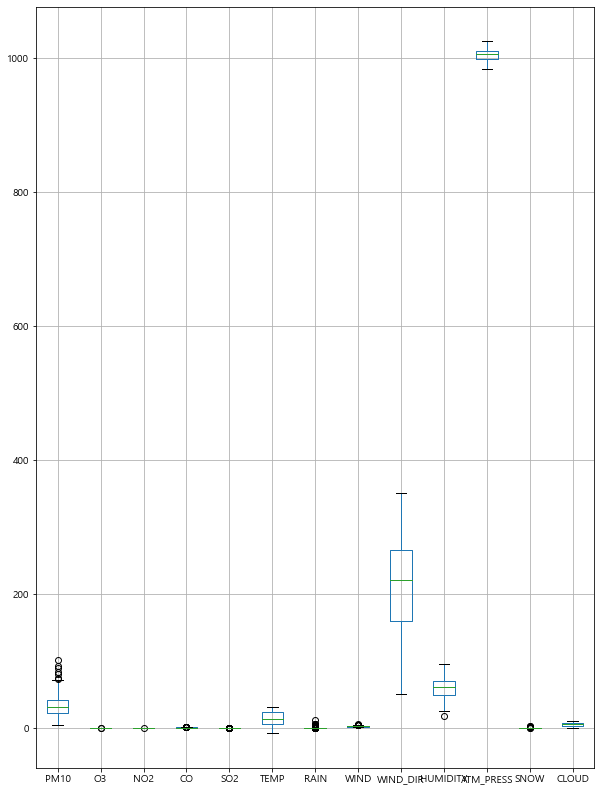

In [7]:
df_raw.boxplot(figsize = (10, 14))

> boxplot을 통해 확인해본 결과 다수의 변수에서 이상치가 존재함을 확인할 수 있다. 정말 이상치인지 의문을 가지고 생각을 해보았다.
  
> 목적변수인 미세먼지10의 농도 수치는 충분히 다양하니 이상치가 있을 수 있다고 생각하고 의미있는 데이터라고 생각해 삭제하지 않는다.  

>  RAIN과 SNOW 변수의 경우 비/눈이 왔는지 안왔는지 범주형 변수로 바꿀 예정이므로 현재 보이는 이상치에 대해 무시할 수 있다.

> 나머지 변수에 대해서 미세먼지 발생에 대해 충분히 영향을 줄 수 있는 수치라고 판단하고 이상치를 삭제하지 않고 반영할 것이다.(삭제할 경우의 정보손실률도 무시하지 못하고, 자료 수가 366개일 뿐이기 때문)

#### 날짜 데이터(의미X)를 뺀 나머지에 대한 히스토그램

In [8]:
df_x = df_raw.drop('MeasDate', axis = 1)

array([[<AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'O3'}>,
        <AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'CO'}>],
       [<AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'TEMP'}>,
        <AxesSubplot:title={'center':'RAIN'}>,
        <AxesSubplot:title={'center':'WIND'}>],
       [<AxesSubplot:title={'center':'WIND_DIR'}>,
        <AxesSubplot:title={'center':'HUMIDITY'}>,
        <AxesSubplot:title={'center':'ATM_PRESS'}>,
        <AxesSubplot:title={'center':'SNOW'}>],
       [<AxesSubplot:title={'center':'CLOUD'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

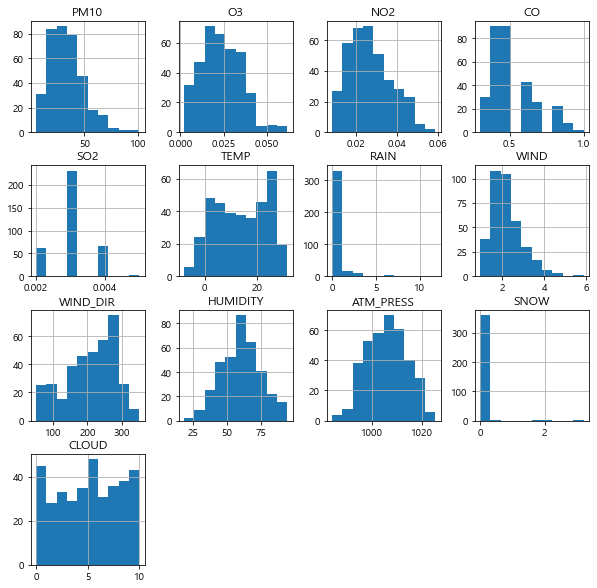

In [9]:
df_x.hist(figsize = (10,10))

> 날짜 변수를 제외한 나머지 변수에 대해 히스토그램을 그려본 결과 어느 정도 연속형 변수의 분포를 보여주고 있는데 이때까지 판단한 것과 다른 변수들이 보인다.  
  
> SNOW, RAIN은 전처리 할 때 범주형 변수 변경 예정인데 SO2와 CO의 경우도 연속형이 아닌 구간별로 나타나는 범주형처럼 보여진다. 하지만 두 변수는 농도를 나타내는 변수라 어떤 기준으로 이산형 변수로 만들지 고민하고 후에 파생변수로 만들고자 한다.

> 사전 조사 결과, CLOUD와 WIND_DIR 역시 각각 분위(구름의 비율 - 최고 10)와 방위(360도 기준)으로 표시된 것을 알 수 있다. 둘 다 연속형 데이터이지만 기준에 따라 범주형 데이터로도 생성 가능하다. WIND_DIR는 방향 개념이라 기준을 잡기가 어렵다고 생각하지만 구름의 비율은 많은지 적은지 나누는 게 가능하기 때문에 범주형 변수로 변환하고자 한다.

## 3. 데이터 전처리

#### 결측치 처리

In [10]:
df_raw.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

> 목표변수의 결측치의 경우 지도학습에서 사용될 수 없으므로 해당하는 행을 전체 제거한다.

In [11]:
df_raw[df_raw['PM10'].isnull()]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
328,2020-05-24,NaN,NaN,NaN,NaN,NaN,17.48,1.45,2.85,257,83.3,999.4,0.0,8.21


In [12]:
df_raw.dropna(subset=['PM10'], axis = 0, inplace=True)
df_raw.isnull().sum()

MeasDate      0
PM10          0
O3            0
NO2           0
CO           54
SO2           0
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

> CO는 연속형 변수이기 때문에 결측치를 대체하기 위해 가장 쓰이는 일반적인 방법인 평균을 대입하고자 한다. 이로써 비롯되는 편향성과 또 다르게 결과가 나올지라도 CO의 결측치 대입 방식을 고려해서 분석해야한다. 

In [13]:
co_mean = df_raw['CO'].mean()
df_raw['CO'].fillna(co_mean, inplace = True)
co_mean

0.5170418006430879

In [14]:
df_raw.isnull().sum()

MeasDate     0
PM10         0
O3           0
NO2          0
CO           0
SO2          0
TEMP         0
RAIN         0
WIND         0
WIND_DIR     0
HUMIDITY     0
ATM_PRESS    0
SNOW         0
CLOUD        0
dtype: int64

#### 파생변수 생성

- RAIN, SNOW의 유무에 따라 구분되는 범주형 변수 생성

In [15]:
df_raw["ISRAIN"] = np.where(df_raw["RAIN"] == 0, 0, 1)
df_raw["ISSNOW"] = np.where(df_raw["SNOW"] == 0, 0, 1)

In [16]:
df_raw["ISRAIN"] = df_raw["ISRAIN"].astype(object)
df_raw["ISSNOW"] = df_raw["ISSNOW"].astype(object)

- CO, SO2에 대한 파생변수  
환경공단에서 제시한 농도범위에 따라 기술통계량을 분석해보았더니 CO, SO2는 모든 수치가 "좋음"으로 판단된다. 다 좋음으로 판단이 된다면 굳이 분석에 사용할 필요가 없지만, 이 변수들을 빼게 되면 적은 데이터의 양이 더 적어지게 되고, 정보 손실률이 크기 때문에 다른 기준으로 파생변수를 생성하고자 한다. 새롭게 제시하는 방식은 **각 변수의 평균보다 작을 때는 농도가 낮은 것이니 "더 좋은 상태", 평균보다 클 때는 "덜 좋은 상태" 이런 식으로 구분**하고자 한다.

In [17]:
df_raw['CO_NG'] = np.where(df_raw.CO >= co_mean, 1, 0)
df_raw[df_raw['CO_NG'] == 1]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,ISRAIN,ISSNOW,CO_NG
14,2019-07-15,38.0,0.031,0.034,0.600000,0.002,23.87,1.09,1.05,133,77.9,996.9,0.0,7.58,1,0,1
16,2019-07-17,66.0,0.035,0.029,0.600000,0.003,25.54,0.70,1.18,189,74.5,1001.3,0.0,8.75,1,0,1
17,2019-07-18,70.0,0.056,0.035,0.700000,0.004,27.04,0.00,1.12,192,64.9,998.9,0.0,6.79,0,0,1
25,2019-07-26,22.0,0.021,0.027,0.517042,0.002,25.06,3.00,1.72,187,94.9,993.9,0.0,9.88,1,0,1
26,2019-07-27,20.0,0.028,0.025,0.517042,0.003,28.10,0.10,1.15,151,78.6,995.6,0.0,8.21,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2020-03-25,44.0,0.022,0.041,0.600000,0.004,12.23,0.00,1.88,161,32.8,1009.9,0.0,3.58,0,0,1
329,2020-05-25,45.0,0.038,0.034,0.600000,0.003,16.70,0.00,2.07,274,80.2,1002.3,0.0,8.17,0,0,1
351,2020-06-16,52.0,0.062,0.020,0.600000,0.003,24.30,0.00,2.19,260,63.2,995.8,0.0,6.58,0,0,1
352,2020-06-17,46.0,0.044,0.026,0.600000,0.005,24.40,0.00,2.04,203,59.8,995.3,0.0,7.17,0,0,1


In [18]:
so2_mean = df_raw['SO2'].mean()
df_raw['SO2_NG'] = np.where(df_raw.SO2 >= so2_mean, 1, 0)
df_raw[df_raw['SO2_NG'] == 1]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,ISRAIN,ISSNOW,CO_NG,SO2_NG
12,2019-07-13,29.0,0.043,0.023,0.5,0.004,24.87,0.0,1.66,210,67.4,992.3,0.0,7.79,0,0,0,1
17,2019-07-18,70.0,0.056,0.035,0.7,0.004,27.04,0.0,1.12,192,64.9,998.9,0.0,6.79,0,0,1,1
18,2019-07-19,37.0,0.032,0.032,0.5,0.004,28.38,0.0,1.45,107,61.2,996.6,0.0,4.71,0,0,0,1
85,2019-09-24,20.0,0.024,0.029,0.4,0.004,19.71,0.0,1.83,269,60.6,1008.4,0.0,0.08,0,0,0,1
86,2019-09-25,27.0,0.019,0.043,0.6,0.004,20.77,0.0,1.40,265,64.2,1011.4,0.0,5.42,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2020-06-13,47.0,0.050,0.025,0.5,0.004,26.74,0.0,1.92,209,53.3,994.5,0.0,5.38,0,0,0,1
352,2020-06-17,46.0,0.044,0.026,0.6,0.005,24.40,0.0,2.04,203,59.8,995.3,0.0,7.17,0,0,1,1
353,2020-06-18,31.0,0.037,0.024,0.5,0.004,23.31,0.0,1.56,200,61.2,993.3,0.0,9.29,0,0,0,1
358,2020-06-23,37.0,0.038,0.032,0.5,0.004,27.29,0.0,1.96,251,52.5,998.6,0.0,7.04,0,0,0,1


In [19]:
df_raw["CO_NG"] = df_raw["CO_NG"].astype(object)
df_raw["SO2_NG"] = df_raw["SO2_NG"].astype(object)

- CLOUD 범주형 데이터로 변경(5 이상 = 1, 5 미만 = 0)

In [20]:
df_raw["CLOUD_IS"] = np.where(df_raw["CLOUD"] >= 5.0, 1, 0)
df_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,ISRAIN,ISSNOW,CO_NG,SO2_NG,CLOUD_IS
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70,0,0,0,0,1
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83,0,0,0,0,0
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29,0,0,0,0,1
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54,0,0,0,0,0
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92,0,0,0,0,0


In [21]:
df_raw["CLOUD_IS"] = df_raw["CLOUD_IS"].astype(object)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   365 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         365 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       365 non-null    float64       
 7   RAIN       365 non-null    float64       
 8   WIND       365 non-null    float64       
 9   WIND_DIR   365 non-null    int64         
 10  HUMIDITY   365 non-null    float64       
 11  ATM_PRESS  365 non-null    float64       
 12  SNOW       365 non-null    float64       
 13  CLOUD      365 non-null    float64       
 14  ISRAIN     365 non-null    object        
 15  ISSNOW     365 non-null    object        
 16  CO_NG      365 non-null    object        
 1

## 4. 그래프 분석

#### 목표변수 분포 확인

<AxesSubplot:>

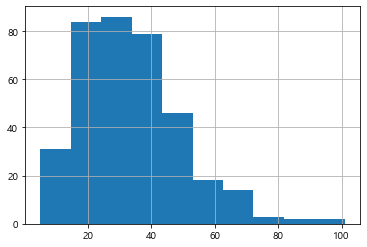

In [22]:
df_raw["PM10"].hist()

> 농도범위에 따라 미세먼지 PM10을 해석하면, 좋음(0 ~ 30)과 보통(31 ~ 80)이 대부분을 차지하는 것을 알 수 있다. 즉 이 데이터를 가지고 모델링할 때 나쁨(81 ~ 150)을 추정하는 데이터는 적고, 최대값이 101이기 때문에 매우나쁨(151 ~)에 대해서는 예측 모델을 생성하기가 힘들다.

#### 설명변수와 목표변수간 관계 확인

In [23]:
# 설명변수, 목표변수 데이터 지정
# df_raw_y = df_raw["PM10"] # 목표변수
# df_raw_x = df_raw.drop(["PM10", "MeasDate", "RAIN", "SNOW"], axis = 1) # 설명 변수(date 제외)

# df_num = df_raw_y.join(df_raw_x)
# df_raw_xx = df_raw.select_dtypes(["float", "int64"])
# df_raw_xx = df_raw_xx.drop(["PM10", "RAIN", "SNOW"], axis = 1)

# df_obj_x = df_raw.select_dtypes("object") #파생변수
# df_num_xy = df_raw.select_dtypes(["float", "int64"])
# df_num_xy = df_num_xy.drop(["RAIN", "SNOW"], axis = 1)

# df_num

df_raw = df_raw.drop(["SNOW","RAIN"], axis = 1)
df_raw = df_raw.drop("MeasDate", axis = 1)


df_num_raw = df_raw.select_dtypes(["float", "int64"])
df_num_raw

df_y = df_num_raw["PM10"]
df_x = df_num_raw.drop("PM10", axis=1)

In [24]:
df_x

,O3,NO2,CO,SO2,TEMP,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
0,0.054,0.021,0.5,0.003,24.03,2.30,249,63.2,995.1,5.70
1,0.053,0.020,0.5,0.003,24.29,2.26,265,63.2,998.6,3.83
2,0.042,0.023,0.4,0.003,24.18,1.79,280,65.3,998.3,6.29
3,0.034,0.026,0.4,0.003,25.35,2.04,263,58.6,996.6,2.54
4,0.045,0.035,0.5,0.003,27.30,1.45,175,45.5,993.5,3.92
...,...,...,...,...,...,...,...,...,...,...
361,0.039,0.016,0.4,0.003,21.66,3.12,228,84.0,996.0,8.73
362,0.044,0.017,0.4,0.004,23.94,1.93,217,69.8,995.8,6.21
363,0.044,0.009,0.4,0.003,25.03,2.35,283,71.3,994.7,2.63
364,0.026,0.028,0.6,0.003,24.06,2.48,103,75.5,992.9,7.58


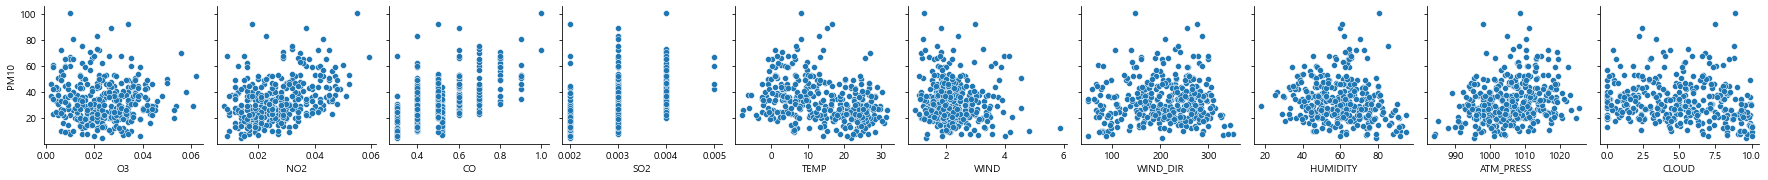

In [25]:
sns.pairplot(df_num_raw, y_vars = ["PM10"], x_vars = df_x)

In [26]:
df_num_raw.corr().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
PM10,1.000,-0.052,0.396,0.548,0.429,-0.310,-0.100,0.020,-0.150,0.253,-0.172
O3,-0.052,1.000,-0.592,-0.509,-0.234,0.516,0.165,0.269,-0.038,-0.534,-0.119
NO2,0.396,-0.592,1.000,0.786,0.563,-0.237,-0.537,-0.408,-0.066,0.420,0.017
CO,0.548,-0.509,0.786,1.000,0.559,-0.340,-0.412,-0.320,0.057,0.385,0.037
SO2,0.429,-0.234,0.563,0.559,1.000,-0.274,-0.253,-0.093,-0.302,0.334,-0.191
TEMP,-0.310,0.516,-0.237,-0.340,-0.274,1.000,-0.216,-0.050,0.404,-0.792,0.342
WIND,-0.100,0.165,-0.537,-0.412,-0.253,-0.216,1.000,0.235,-0.084,-0.054,0.017
WIND_DIR,0.020,0.269,-0.408,-0.320,-0.093,-0.050,0.235,1.000,-0.099,0.068,-0.297
HUMIDITY,-0.150,-0.038,-0.066,0.057,-0.302,0.404,-0.084,-0.099,1.000,-0.510,0.628
ATM_PRESS,0.253,-0.534,0.420,0.385,0.334,-0.792,-0.054,0.068,-0.510,1.000,-0.430


> 목표변수인 미세먼지 농도(PM10)은 설명변수와 크게 양이나 음의 상관관계를 가지지는 않는 것 같다. 그나마 선형관계에 가까운 변수는 일산화탄소(CO), 이산화황(SO2)이다. 하지만 CO의 경우 평균값으로 결측치를 대체해서 이런 결과가 나왔는지 유의할 필요가 있다.

> 설명변수끼리 선형관계를 보이는 것이 있다. 일산화탄소(CO) - 이산화질소(NO2)는 큰 양의 선형관계를 가지며, 온도(TEMP)와 대기압(ATM_PRESS)은 큰 음의 선형관계를 가지는 것을 볼 수 있다.

#### 설명변수 파생변수와 목표변수간 분포 차이

In [27]:
df_obj_x = df_raw.select_dtypes("object")
df_obj_x.head()

,ISRAIN,ISSNOW,CO_NG,SO2_NG,CLOUD_IS
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,0,0,0,0,0


In [28]:
df_obj_x.columns

Index(['ISRAIN', 'ISSNOW', 'CO_NG', 'SO2_NG', 'CLOUD_IS'], dtype='object')

<AxesSubplot:title={'center':'PM10'}, xlabel='ISRAIN'>

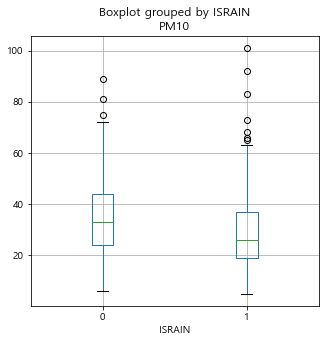

In [29]:
df_raw.boxplot(column = "PM10", by = "ISRAIN", figsize = (5,5))

<AxesSubplot:title={'center':'PM10'}, xlabel='ISSNOW'>

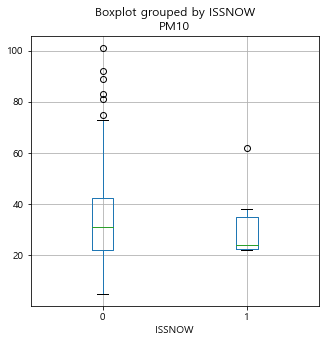

In [30]:
df_raw.boxplot(column = "PM10", by = "ISSNOW", figsize = (5,5))

<AxesSubplot:title={'center':'PM10'}, xlabel='CO_NG'>

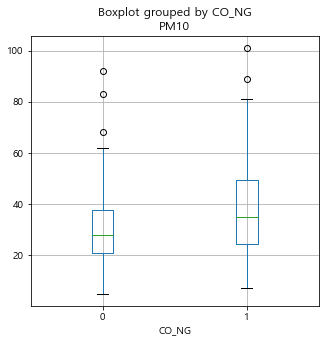

In [31]:
df_raw.boxplot(column = "PM10", by = "CO_NG", figsize = (5,5))

<AxesSubplot:title={'center':'PM10'}, xlabel='SO2_NG'>

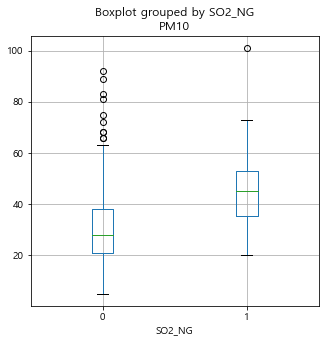

In [32]:
df_raw.boxplot(column = "PM10", by = "SO2_NG", figsize = (5,5))

<AxesSubplot:title={'center':'PM10'}, xlabel='CLOUD_IS'>

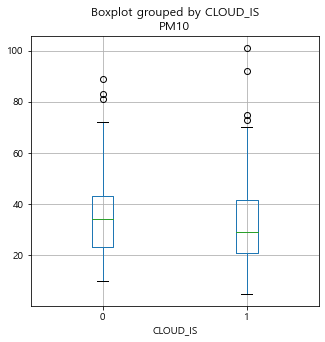

In [33]:
df_raw.boxplot(column = "PM10", by = "CLOUD_IS", figsize = (5,5)) 

> 구름 비율(CLOUD_IS)의 경우 0과 1의 분포가 거의 일치하지만 나머지 범주형 설명변수에 대해서는 분포의 차이가 있을 가능성이 커보인다. 범주에 분포 차이가 크다면 이를 통해 영향인자를 추출하는 것에 의미가 있을까? 이를 확인하기 위해 가설검정을 해보자.

## 5. 통계적 검정

#### 2 Sample t-test

**(1) 가설 수립 및 유의수준 설정**
- 귀무가설 : 두 집단의 평균은 동일하다.(유의한 차이가 없다)
- 대립가설 : 두 집단의 평균은 다르다.(유의한 차이가 있다)
- 유의수준 = 0.05  
  
##### <ISRAIN - PM10>

In [39]:
df_rain_1 = df_raw["PM10"][df_raw["ISRAIN"] == 1]
df_rain_1.unique()

array([  9.,   5.,  38.,  31.,  66.,  16.,  46.,  28.,  22.,  20.,  15.,
        21.,  29.,  27.,   8.,  18.,  33.,  26.,  19.,  10.,  12.,  34.,
        14.,   7.,  35.,  83.,  36.,  23.,  62.,  25., 101.,  73.,  30.,
        37.,  51.,  45.,  49.,  63.,  65.,  68.,  24.,  48.,  41.,  39.,
        92.,  13.,  43.,  40.,   6.])

In [40]:
df_rain_0 = df_raw["PM10"][df_raw["ISRAIN"] == 0]
df_rain_0.unique()

array([29., 26., 30., 28., 16., 10., 12., 40., 70., 37., 19., 44., 27.,
       21., 18., 20., 23., 38., 22., 25., 35., 14., 17., 24., 49., 43.,
       11., 31., 34., 72., 89., 67., 47., 13., 45., 36., 33., 42., 39.,
       61., 60., 51., 59., 65., 53., 52., 50., 46., 56., 71., 15., 66.,
       68., 75., 81., 32., 57., 41., 54., 48.,  6.])

In [41]:
# df 직접 입력
df0 = pd.DataFrame({'RAIN': df_rain_0})
df1 = pd.DataFrame({'RAIN': df_rain_1})

In [48]:
# 정규성 검정
from scipy.stats import shapiro
from scipy import stats
shapiro(df0)

ShapiroResult(statistic=0.9625291228294373, pvalue=3.7925456126686186e-06)

In [44]:
shapiro(df1)

ShapiroResult(statistic=0.8876467347145081, pvalue=9.800134392889959e-08)

> 두 집단이 다 정규성을 만족하지 않으므로 비모수 검정을 실시하여야 한다.   
  따라서 Mann-whitney test를 진행하려고 한다.

In [56]:
from scipy.stats import mannwhitneyu
print("p-value: ", mannwhitneyu(df0, df1))

p-value:  MannwhitneyuResult(statistic=985.5, pvalue=0.36124156366494475)


> 비모수검정 결과 두 집단의 평균은 차이가 없다고 할 수 있다.(유의한 차이가 없다)  
  어떤 속성에 의한 것이 아니라 우연히 발생했을 가능성이 크다고 해석된다.

##### <ISSNOW - PM10>

In [51]:
df_snow_1 = df_raw["PM10"][df_raw["ISSNOW"] == 1]
df_snow_0 = df_raw["PM10"][df_raw["ISSNOW"] == 0]

In [52]:
# df 직접 입력
df0 = pd.DataFrame({'SNOW': df_snow_0})
df1 = pd.DataFrame({'SNOW': df_snow_1})

In [53]:
# 정규성 검정
shapiro(df0)

ShapiroResult(statistic=0.9501688480377197, pvalue=1.1793275245253199e-09)

In [54]:
shapiro(df1)

ShapiroResult(statistic=0.7293481826782227, pvalue=0.01241486705839634)

> 두 집단이 다 정규성을 만족하지 않으므로 Mann-whitney test 진행

In [58]:
print("p-value: ", mannwhitneyu(df0, df1))

p-value:  MannwhitneyuResult(statistic=985.5, pvalue=0.36124156366494475)


> 비모수검정 결과 두 집단의 평균은 차이가 없다고 할 수 있다.

##### <CO_NG - PM10>

In [59]:
df_co1 = df_raw["PM10"][df_raw["CO_NG"] == 1]
df_co0 = df_raw["PM10"][df_raw["CO_NG"] == 0]

In [60]:
# df 직접 입력
df0 = pd.DataFrame({'CO': df_co0})
df1 = pd.DataFrame({'CO': df_co1})

In [61]:
shapiro(df0)

ShapiroResult(statistic=0.9527677893638611, pvalue=2.096325488309958e-06)

In [62]:
shapiro(df1)

ShapiroResult(statistic=0.9611594676971436, pvalue=0.00024217237660195678)

> 두 집단이 다 정규성을 만족하지 않으므로 Mann-whitney test 진행

In [63]:
print("p-value: ", mannwhitneyu(df0, df1))

p-value:  MannwhitneyuResult(statistic=12284.5, pvalue=3.091389232980161e-05)


> 비모수검정 결과 두 집단의 평균은 유의한 **차이가 있다**고 할 수 있다. 즉 속성이 영향을 주기 때문에 차이가 있다는 뜻인데 이는 곧 CO의 농도가 미세먼지 농도에 영향을 주는 중요인자라고 판단한다.

##### <SO2_NG - PM10>

In [64]:
df_so2_1 = df_raw["PM10"][df_raw["SO2_NG"] == 1]
df_so2_0 = df_raw["PM10"][df_raw["SO2_NG"] == 0]

In [65]:
# df 직접 입력
df0 = pd.DataFrame({'SO2': df_so2_0})
df1 = pd.DataFrame({'SO2': df_so2_1})

In [66]:
shapiro(df0)

ShapiroResult(statistic=0.9315066933631897, pvalue=2.133277166027625e-10)

In [67]:
shapiro(df1)

ShapiroResult(statistic=0.9540067315101624, pvalue=0.011014709249138832)

> 두 집단이 다 정규성을 만족하지 않으므로 Mann-whitney test 진행

In [68]:
print("p-value: ", mannwhitneyu(df0, df1))

p-value:  MannwhitneyuResult(statistic=4426.0, pvalue=2.439033250339417e-14)


> 비모수검정 결과 두 집단의 평균은 유의한 **차이가 있다**고 할 수 있다. 즉 속성이 영향을 주기 때문에 차이가 있다는 뜻인데 이는 곧 SO2의 농도가 미세먼지 농도에 영향을 주는 중요인자라고 판단한다.

##### <CLOUD_IS - PM10>

In [69]:
df_cl1 = df_raw["PM10"][df_raw["CLOUD_IS"] == 1]
df_cl0 = df_raw["PM10"][df_raw["CLOUD_IS"] == 0]

In [70]:
# df 직접 입력
df0 = pd.DataFrame({'Cloud': df_cl0})
df1 = pd.DataFrame({'Cloud': df_cl1})

In [71]:
shapiro(df0)

ShapiroResult(statistic=0.9386237859725952, pvalue=1.1140557489852654e-06)

In [72]:
shapiro(df1)

ShapiroResult(statistic=0.9411388635635376, pvalue=3.869167244374694e-07)

> 두 집단이 다 정규성을 만족하므로 등분산성을 확인한다.

In [73]:
# 등분산성 검정
stats.bartlett(df0['Cloud'],df1['Cloud'])

BartlettResult(statistic=2.1752009941058468, pvalue=0.14025119134658118)

> 두 집단에서 등분산성이 보인다. 따라서 2-sample t test의 p값을 통해 가설검정을 진행해본다.

In [74]:
# 2-Sample t-test
t_result = stats.ttest_ind(df0, df1, equal_var = True) #등분산이므로 equal_var = True

# 2-Sample t-test의 t, p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Sample t-test의 t, p값 출력
print( "2-Sample t-test ")
print( "t검정통계량: {} " .format(t))
print( "p-value: {} " .format(p))

2-Sample t-test 
t검정통계량: [2.125] 
p-value: [0.034] 


> 비모수검정 결과 두 집단의 평균은 유의한 **차이가 있다**고 할 수 있다. 즉 속성이 영향을 주기 때문에 차이가 있다는 뜻인데 이는 곧 구름이 많이 있는지의 여부가 미세먼지 농도에 영향을 주는 중요인자라고 판단한다.

> **그래프 분석결과와 통계 가설 검정 결과를 통해 CO, SO2, 구름유무차이가 미세먼지 농도 PM10에 영향을 미치는 유의한 잠재인자라고 판단하고자 한다.**
  >> CO와 강한 양의 선형관계를 가지는 NO2는 유의한 인자인지 모르겠으나 유의해서 볼 예정이다.

## 6. 모델링 및 평가

#### 회귀분석 - 다중선형

In [78]:
# 전체 변수
df_raw

,PM10,O3,NO2,CO,SO2,TEMP,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD,ISRAIN,ISSNOW,CO_NG,SO2_NG,CLOUD_IS
0,29.0,0.054,0.021,0.5,0.003,24.03,2.30,249,63.2,995.1,5.70,0,0,0,0,1
1,26.0,0.053,0.020,0.5,0.003,24.29,2.26,265,63.2,998.6,3.83,0,0,0,0,0
2,30.0,0.042,0.023,0.4,0.003,24.18,1.79,280,65.3,998.3,6.29,0,0,0,0,1
3,28.0,0.034,0.026,0.4,0.003,25.35,2.04,263,58.6,996.6,2.54,0,0,0,0,0
4,29.0,0.045,0.035,0.5,0.003,27.30,1.45,175,45.5,993.5,3.92,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,19.0,0.039,0.016,0.4,0.003,21.66,3.12,228,84.0,996.0,8.73,1,0,0,0,1
362,22.0,0.044,0.017,0.4,0.004,23.94,1.93,217,69.8,995.8,6.21,0,0,0,1,1
363,27.0,0.044,0.009,0.4,0.003,25.03,2.35,283,71.3,994.7,2.63,0,0,0,0,0
364,36.0,0.026,0.028,0.6,0.003,24.06,2.48,103,75.5,992.9,7.58,1,0,1,0,1


In [77]:
#연속형 변수
df_num_raw

,PM10,O3,NO2,CO,SO2,TEMP,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
0,29.0,0.054,0.021,0.5,0.003,24.03,2.30,249,63.2,995.1,5.70
1,26.0,0.053,0.020,0.5,0.003,24.29,2.26,265,63.2,998.6,3.83
2,30.0,0.042,0.023,0.4,0.003,24.18,1.79,280,65.3,998.3,6.29
3,28.0,0.034,0.026,0.4,0.003,25.35,2.04,263,58.6,996.6,2.54
4,29.0,0.045,0.035,0.5,0.003,27.30,1.45,175,45.5,993.5,3.92
...,...,...,...,...,...,...,...,...,...,...,...
361,19.0,0.039,0.016,0.4,0.003,21.66,3.12,228,84.0,996.0,8.73
362,22.0,0.044,0.017,0.4,0.004,23.94,1.93,217,69.8,995.8,6.21
363,27.0,0.044,0.009,0.4,0.003,25.03,2.35,283,71.3,994.7,2.63
364,36.0,0.026,0.028,0.6,0.003,24.06,2.48,103,75.5,992.9,7.58


In [79]:
# RAIN, SNOW 제외 전체 변수에 대한 모델 구축
reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + TEMP + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + \
CLOUD + C(ISRAIN) + C(ISSNOW) + C(CO_NG) + C(SO2_NG) + C(CLOUD_IS)", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     23.78
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           1.24e-44
Time:                        13:52:30   Log-Likelihood:                -1399.5
No. Observations:                 365   AIC:                             2831.
Df Residuals:                     349   BIC:                             2893.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          342.2600    162.020  

> 설명변수 전체(삭제한 변수 제외)에 대해 회귀모델을 진행해보았다.  
  
>> X변수 갯수는 15개, 데이터 갯수는 365개이다.  
  
>> p-value가 유의수준 0.05보다 작으므로 회귀모델로서 의미가 있다.  
  
>> adjust R^2를 확인해보니 모델의 설명변수를 48.4% 설명할 수 있다. -> 설명력이 낮다.  
  
>> 회귀계수를 검정해보니 O3, NO2, CO, TEMP, WIND, WIND_DIR, ATM_PRESS는 유의한 변수임을 확인할 수 있다.

- 변수의 경향성에 대해서는 위에서 분석하였다. 선형관계가 그나마 있어보이는 변수들이 있긴 했으나, 다중공선성 확인을 통해 높은 상관관계가 변수 사이에 존재하는지 확인해보려고 한다.

In [80]:
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_num_raw_x = df_num_raw.drop("PM10", axis = 1)

# statsmodels의 상수항 추가 함수 적용
df_num_raw_x_const = add_constant(df_num_raw_x) 

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_num_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_num_raw_x_const.values, i) for i in range(df_num_raw_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
7,WIND_DIR,1.484
6,WIND,1.884
4,SO2,1.926
10,CLOUD,2.066
8,HUMIDITY,2.514
1,O3,2.675
3,CO,3.563
5,TEMP,4.168
9,ATM_PRESS,4.491
2,NO2,4.839


> 연속형 설명변수에 대해 다중공선성을 확인해본 결과 연속형 설명변수간 다중공선성이 보인다고 할 수 없다. 그나마 NO2가 젤 높지만 제거할 경우 다중공선성이 보이지도 않는데 제거하게 되면 오히려 모델에 정보손실이 클 것 같다는 판단이 든다.

In [85]:
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거

model = LinearRegression()
# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_x, df_y)
# 선택된 변수
selected_cols = df_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols)) 
print("Removed Variables : {}".format(removed_cols))


Selected Variables : Index(['O3', 'NO2', 'CO', 'SO2', 'TEMP', 'WIND', 'CLOUD'], dtype='object')
Removed Variables : Index(['WIND_DIR', 'HUMIDITY', 'ATM_PRESS'], dtype='object')


> 위에서 OLS 모델의 회귀계수를 검정해보니 O3, NO2, CO, TEMP, WIND, WIND_DIR, ATM_PRESS는 유의한 변수임을 확인할 수 있었다. 후진제거법을 통해 유의한 변수를 똑같이 분류해낼까 싶어서 확인해보니 WIND_DIR, ATM_PRESS -> SO2, CLOUD가 선택되었다. 
  
> 공통적으로 유의한 변수인 **O3, NO2, CO, TEMP**를 미세먼지 농도 PM10에 영향을 미치는 잠재인자라고 판단하겠다.

In [87]:
reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + TEMP + C(ISRAIN) + C(ISSNOW) + C(CO_NG) + C(SO2_NG) + C(CLOUD_IS)", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     35.19
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           3.39e-44
Time:                        16:49:44   Log-Likelihood:                -1411.6
No. Observations:                 365   AIC:                             2843.
Df Residuals:                     355   BIC:                             2882.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -18.8285      4.535  

> 영향을 주는 잠재인자와 범주형 설명변수를 가지고 다중선형회귀 분석을 할 경우 모델의 설명력에 있어 겨우 3% 차이가 난다. 즉, 나머지 설명변수 6개를 삭제해도 정보손실율이 크지 않다는 것을 뜻한다.

In [95]:
# 설명변수 표준화 적용  표준화 회귀계수 산출 목적
scaler = StandardScaler()
# Scale 변환대상 변수 : 일반적으로 설명변수
cols = df_x.columns
# Scale 변환
np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)
# 목표변수 추가
df_scaled["PM10"]= df_raw["PM10"]
reg_model_scaled = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + TEMP + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + CLOUD", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()

print(reg_result_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     28.74
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           3.92e-40
Time:                        17:55:45   Log-Likelihood:                -1414.4
No. Observations:                 364   AIC:                             2851.
Df Residuals:                     353   BIC:                             2894.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.5436      0.627     53.477      0.0

<AxesSubplot:>

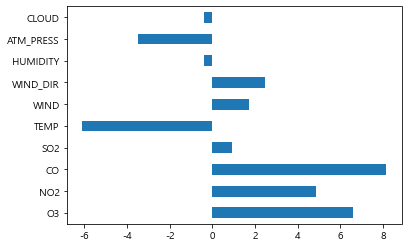

In [106]:
reg_result_scaled_coef = pd.DataFrame({"Coef": reg_result_scaled.params.values[1:]}, index = df_x.columns)
reg_result_scaled_coef.plot.barh(y = "Coef", legend = False)


> 연속형인 설명변수에 대해서 회귀계수를 산출하기 위해 표준화를 시켜주었다. 표준화한 회귀계수를 보면 위와 같다. 방향은 상관없이 막대의 길이를 통해 목표변수에 영향을 많이 끼친다는 뜻이다. 그래프를 해석해보면 미세먼지 농도 PM10에 대해서 영향을 많이 끼치는 인자는 **CO, NO2, O3, TEMP**인 것을 다시 확인할 수 있다.

#### 회귀분석 - 다중선형
- 회귀계수에 제약조건 부여 : 모델의 일반화 안정성 성능 향상

In [109]:
df_raw.head()

,PM10,O3,NO2,CO,SO2,TEMP,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD,ISRAIN,ISSNOW,CO_NG,SO2_NG,CLOUD_IS
0,29.0,0.054,0.021,0.5,0.003,24.03,2.30,249,63.2,995.1,5.70,0,0,0,0,1
1,26.0,0.053,0.020,0.5,0.003,24.29,2.26,265,63.2,998.6,3.83,0,0,0,0,0
2,30.0,0.042,0.023,0.4,0.003,24.18,1.79,280,65.3,998.3,6.29,0,0,0,0,1
3,28.0,0.034,0.026,0.4,0.003,25.35,2.04,263,58.6,996.6,2.54,0,0,0,0,0
4,29.0,0.045,0.035,0.5,0.003,27.30,1.45,175,45.5,993.5,3.92,0,0,0,0,0


In [115]:
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop("PM10", axis=1, inplace = False)

##### Ridge

In [116]:
# Ridge
train_score = []
para_alpha = [n_alpha * 0.1 for n_alpha in range(1,11)]

for v_alpha in para_alpha:
    ridge = Ridge(random_state=1234, alpha = v_alpha)
    ridge.fit(df_raw_x, df_raw_y)
    train_score.append(ridge.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainScore"] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.457704
1,0.2,0.449546
2,0.3,0.444748
3,0.4,0.440716
4,0.5,0.436915
5,0.6,0.433200
6,0.7,0.429536
7,0.8,0.425922
8,0.9,0.422366
9,1.0,0.418878


In [117]:
ridge_final = Ridge(alpha=0.1, random_state = 1234)
result = ridge_final.fit(df_raw_x, df_raw_y)

df_ridge = pd.DataFrame()
df_ridge["variable"] = df_raw_x.columns
df_ridge["Coef"] = pd.DataFrame(result.coef_)
df_ridge

,variable,Coef
0,O3,79.339660
1,NO2,17.707046
2,CO,95.211341
3,SO2,0.597775
4,TEMP,-0.253682
5,WIND,1.686465
6,WIND_DIR,0.042450
7,HUMIDITY,-0.141474
8,ATM_PRESS,-0.509932
9,CLOUD,-0.721472


In [123]:
print(result.intercept_)

499.3667658632304


<AxesSubplot:>

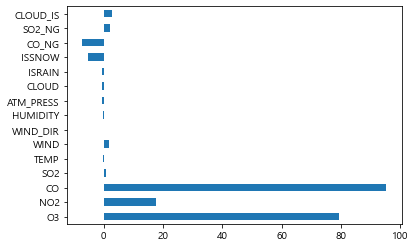

In [124]:
df_ridge_coef = pd.DataFrame({"Coef": result.coef_}, index = df_raw_x.columns)
df_ridge_coef.plot.barh(y="Coef", legend = False)

> Ridge 회귀분석을 선택하고 규제화 강도는 설명력이 가장 높게 나타나는 0.1을 선택하였다. 모델을 선정하고 변수의 중요도를 확인해보니 **CO, O3, NO2 순으로 영향이 크다**고 해석할 수 있다.

##### Lasso

In [125]:
train_score = []
para_alpha = [n_alpha * 0.1 for n_alpha in range(1,11)]

for v_alpha in para_alpha:
    lasso = Lasso(random_state=1234, alpha = v_alpha)
    lasso.fit(df_raw_x, df_raw_y)
    train_score.append(lasso.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainScore"] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.429715
1,0.2,0.397781
2,0.3,0.377791
3,0.4,0.354741
4,0.5,0.317417
5,0.6,0.263925
6,0.7,0.221695
7,0.8,0.215266
8,0.9,0.207980
9,1.0,0.199836


In [126]:
lasso_final = Lasso(alpha=0.1, random_state = 1234)
result = lasso_final.fit(df_raw_x, df_raw_y)

df_lasso = pd.DataFrame()
df_lasso["variable"] = df_raw_x.columns
df_lasso["Coef"] = pd.DataFrame(result.coef_)
df_lasso

,variable,Coef
0,O3,0.000000
1,NO2,0.000000
2,CO,79.450459
3,SO2,0.000000
4,TEMP,-0.274603
5,WIND,0.834300
6,WIND_DIR,0.040522
7,HUMIDITY,-0.157383
8,ATM_PRESS,-0.528708
9,CLOUD,-0.537372


In [127]:
print(result.intercept_)

530.8459366577245


<AxesSubplot:>

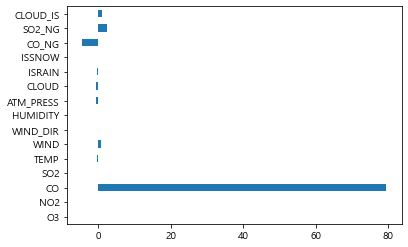

In [128]:
df_lasso_coef = pd.DataFrame({"Coef": result.coef_}, index = df_raw_x.columns)
df_lasso_coef.plot.barh(y="Coef", legend = False)

> Lasso 회귀분석을 해본 결과 앞선 분석에서 중요하다고 여겼던 NO2, O3의 계수가 0이 됨을 알 수 있다. 왜 이런 현상이 나오는지 예측하기로는 Lasso는 상관성이 높은 변수가 있을 때 하나의 변수를 선택하는 단점이 있는데, 앞서 상관계수에서 CO-NO2 사이에 양의 상관관계가 있음을 확인했었다. 그렇기 때문에 아마 CO와 NO2중 CO만 선택하여 이런 결과가 나타나지 않았나 예측한다.

#### Elastic Net

In [129]:
#ElasticNet
train_score = []
para_alpha = [n_alpha * 0.1 for n_alpha in range(1,11)]

for v_alpha in para_alpha:
    elastic = ElasticNet(random_state=1234, alpha = v_alpha)
    elastic.fit(df_raw_x, df_raw_y)
    train_score.append(elastic.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainScore"] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.276145
1,0.2,0.249525
2,0.3,0.232328
3,0.4,0.218739
4,0.5,0.207353
5,0.6,0.197381
6,0.7,0.188529
7,0.8,0.180599
8,0.9,0.173579
9,1.0,0.167247


In [130]:
elastic_final = ElasticNet(alpha=0.1, random_state = 1234)
result = elastic_final.fit(df_raw_x, df_raw_y)

df_elastic = pd.DataFrame()
df_elastic["variable"] = df_raw_x.columns
df_elastic["Coef"] = pd.DataFrame(result.coef_)
df_elastic

,variable,Coef
0,O3,0.000000
1,NO2,0.000000
2,CO,9.310433
3,SO2,0.000000
4,TEMP,-0.566147
5,WIND,-1.563991
6,WIND_DIR,0.019407
7,HUMIDITY,-0.029012
8,ATM_PRESS,-0.370096
9,CLOUD,-0.636575


In [131]:
print(result.intercept_)

409.68414090777685


<AxesSubplot:>

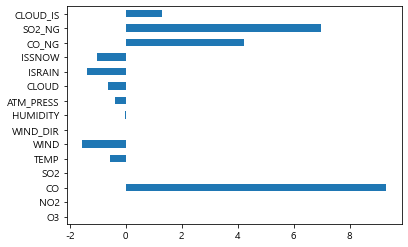

In [132]:
df_elastic_coef = pd.DataFrame({"Coef": result.coef_}, index = df_raw_x.columns)
df_elastic_coef.plot.barh(y="Coef", legend = False)

> 여기서 역시 CO가 중요도가 돋보이게 크다는 것을 알 수 있다. 그리고 SO2 발생, CO의 발생에 대해서도 꽤 영향이 있다는 것을 볼 수 있다.

> 하지만 전체적으로 규제화 강도를 구할 때 규제화 강도의 변화에 따른 **훈련 정확도가 너무 낮다**. 모델을 구축은 하지만 정확도가 떨어지면 현 비즈니스에서 사용하기 힘들 것이다.`

#### 의사결정트리

In [147]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (255, 15)
train data Y size : (255,)
test data X size : (110, 15)
test data Y size : (110,)


In [148]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.194


> 훈련 데이터에 대해 과대적합 경향을 보이고, 테스트 데이터에 대해 정확도가 너무 낮고 차이가 커서 성능이 좋지 않은 모델이다.

In [138]:
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]
para_split = [n_split * 2 for n_split in range(2, 20)]
para_depth = [depth for depth in range(1, 11)]

# GridSearchCV를 이용한 최적 parameter 찾기
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],
              "max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))


best estimator model: 
DecisionTreeRegressor(criterion='mae', max_depth=6, max_features='auto',
                      min_samples_leaf=7, min_samples_split=30)

best parameter: 
{'criterion': 'mae', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 30}

best score: 
0.399


> 최적의 파라미터를 구해보았는데 최적을 구했음에도 불구하고 설명력이 약 40%밖에 안된다는 것에서 아마 비즈니스적으로 모델을 적용하기에는 힘들 것이다.

In [146]:
tree_final = DecisionTreeRegressor(min_samples_leaf=7, min_samples_split=30,
                                  max_depth=6, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)
print("Score on training set : {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set : 0.546
Score on test set : 0.275


> 최적의 파라미터를 사용해 의사결정나무 모델을 학습시키는데 과적합은 줄었지만 훈련 데이터와 테스트 데이터에 대한 정확도가 너무 낮다. 

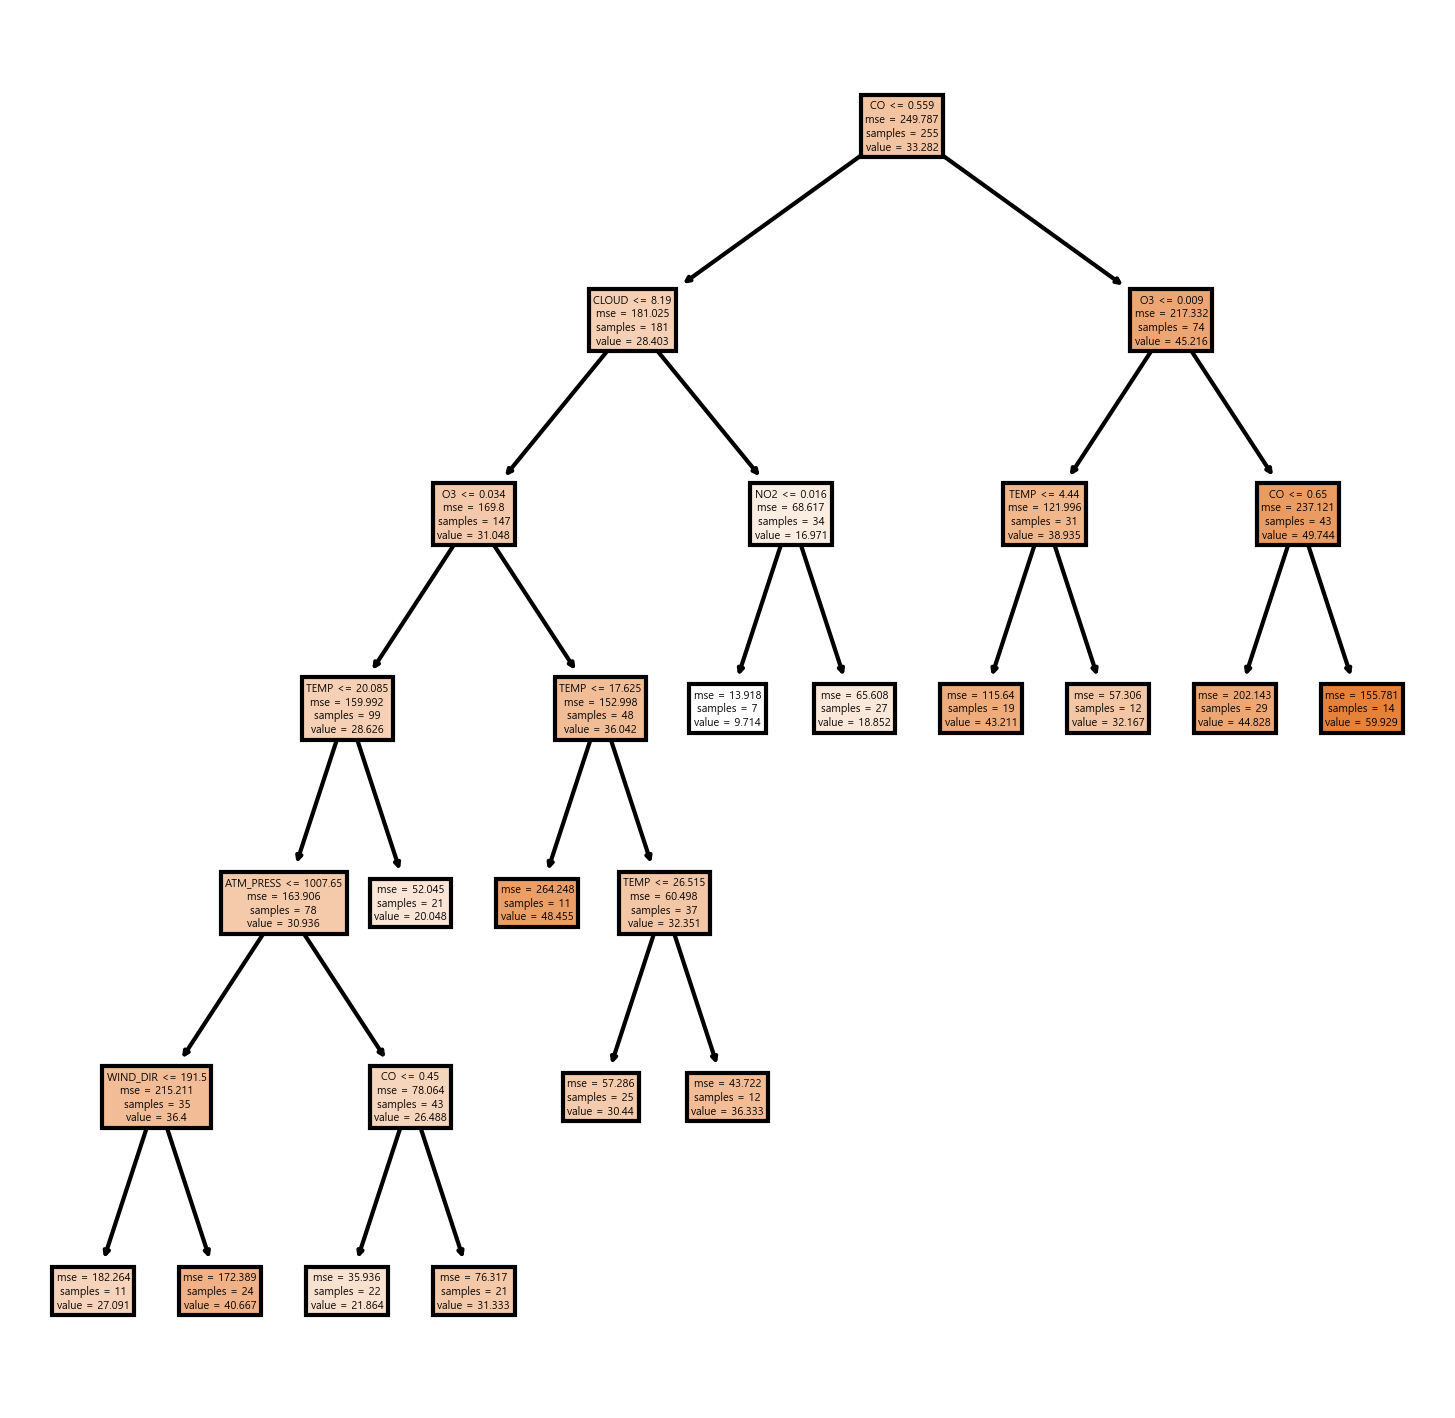

In [141]:
# 최종 모델 시각화
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6, 6), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

In [142]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,CO,0.493
9,CLOUD,0.150
4,TEMP,0.147
0,O3,0.107
8,ATM_PRESS,0.052
6,WIND_DIR,0.038
1,NO2,0.013
3,SO2,0.000
5,WIND,0.000
7,HUMIDITY,0.000


Text(0, 0.5, '변수')

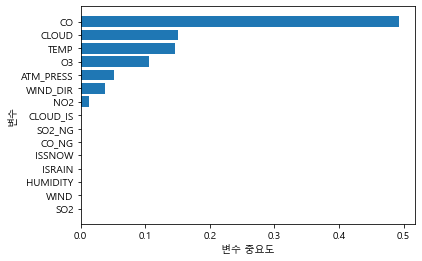

In [143]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

> 이 의사결정나무 모델을 만드는데 미세먼지 농도(PM10)에 영향을 많이 주는 설명변수는 **CO, CLOUD, TEMP, O3, ATM_PRESS, WIND_DIR, NO2**가 있음을 확인할 수 있다.

#### 랜덤 포레스트

In [149]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (255, 15)
train data Y size : (255,)
test data X size : (110, 15)
test data Y size : (110,)


- 기본 옵션으로 모델 생성

In [154]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.921
Score on test set : 0.501


> 기본 파라미터로 모델 생성 시 훈련 데이터에 대한 정확도가 높지만 테스트 데이터에 대한 정확도가 낮아 성능이 좋지 않고 일반화가 힘든 모델이라고 할 수 있다.

- n_estimators : 트리 수 변경에 따른 모델 성능

In [156]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf =RandomForestRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.894,0.467
1,20,0.904,0.463
2,30,0.909,0.459
3,40,0.910,0.463
4,50,0.913,0.471
5,60,0.917,0.475
6,70,0.921,0.492
7,80,0.921,0.497
8,90,0.921,0.500
9,100,0.921,0.501


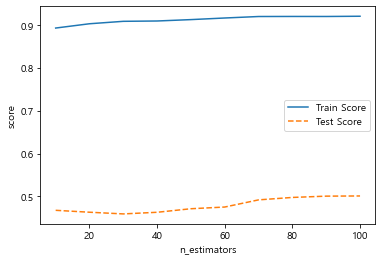

In [157]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label= "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

> 훈련 데이터의 경우 70을 기준으로 변동이 없이 일정해지고 테스트 데이터의 정확도는 트리 수가 증가할수록 증가하고 있다. 그래서 100을 선택하고 나머지 파라미터 수정하고자 한다.

- min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [159]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators=100, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.921,0.501
1,2,0.880,0.512
2,3,0.831,0.514
3,4,0.790,0.499
4,5,0.753,0.481
5,6,0.721,0.471
6,7,0.689,0.462
7,8,0.660,0.452
8,9,0.637,0.445
9,10,0.615,0.429


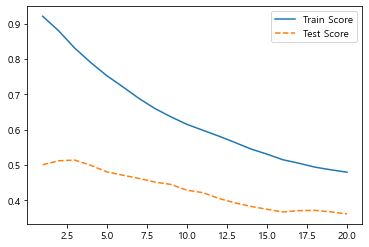

In [160]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label= "Test Score")
plt.legend()

> 잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력을 감소하므로 테스트 데이터의 정확도 변화에 따라 3 선택

- min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [161]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 100,  min_samples_leaf=3,
                                min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.831,0.514
1,6,0.831,0.514
2,8,0.805,0.514
3,10,0.782,0.505
4,12,0.761,0.499
5,14,0.739,0.495
6,16,0.714,0.490
7,18,0.692,0.485
8,20,0.672,0.480
9,22,0.655,0.473


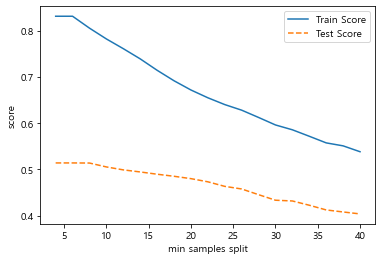

In [162]:
plt.plot(para_split, train_score, linestyle = "-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label= "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

> 분리 노드의 최소 자료 수가 증가하면 모델의 설명력은 감소한다. train과 test 데이터의 성능 변화를 고려하여 급격하게 하락하는 구간을 확인하여 6 선택

- max_depth : 최대 깊이 변경에 따른 모델 성능

In [164]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators=100, min_samples_leaf=8,
                                min_samples_split = 16, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.240,0.338
1,2,0.394,0.341
2,3,0.500,0.417
3,4,0.580,0.441
4,5,0.630,0.448
5,6,0.651,0.450
6,7,0.658,0.451
7,8,0.660,0.452
8,9,0.660,0.452
9,10,0.660,0.452


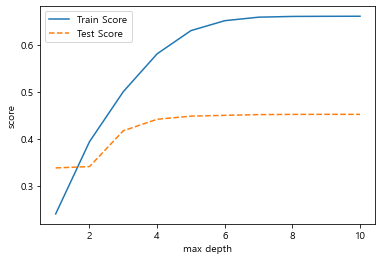

In [165]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

> 최대 깊이 증가에 따라 모델의 설명력은 좋아지는데, train/test 성능 변화를 고려하여 4를 선택한다.

- 최종 모델

In [166]:
rf_final = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, min_samples_split=6,
                                  max_depth=4, random_state = 1234)
rf_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.637
Score on test set : 0.483


> 최종 모델은 훈련 데이터와 테스트 데이터에 대한 정확도 차는 줄었기 때문에 성능은 향상했다고 할 수 있으나 전체적으로 정확도가 너무 낮아 모델로서 설명력이 부족하다고 할 수 있다.

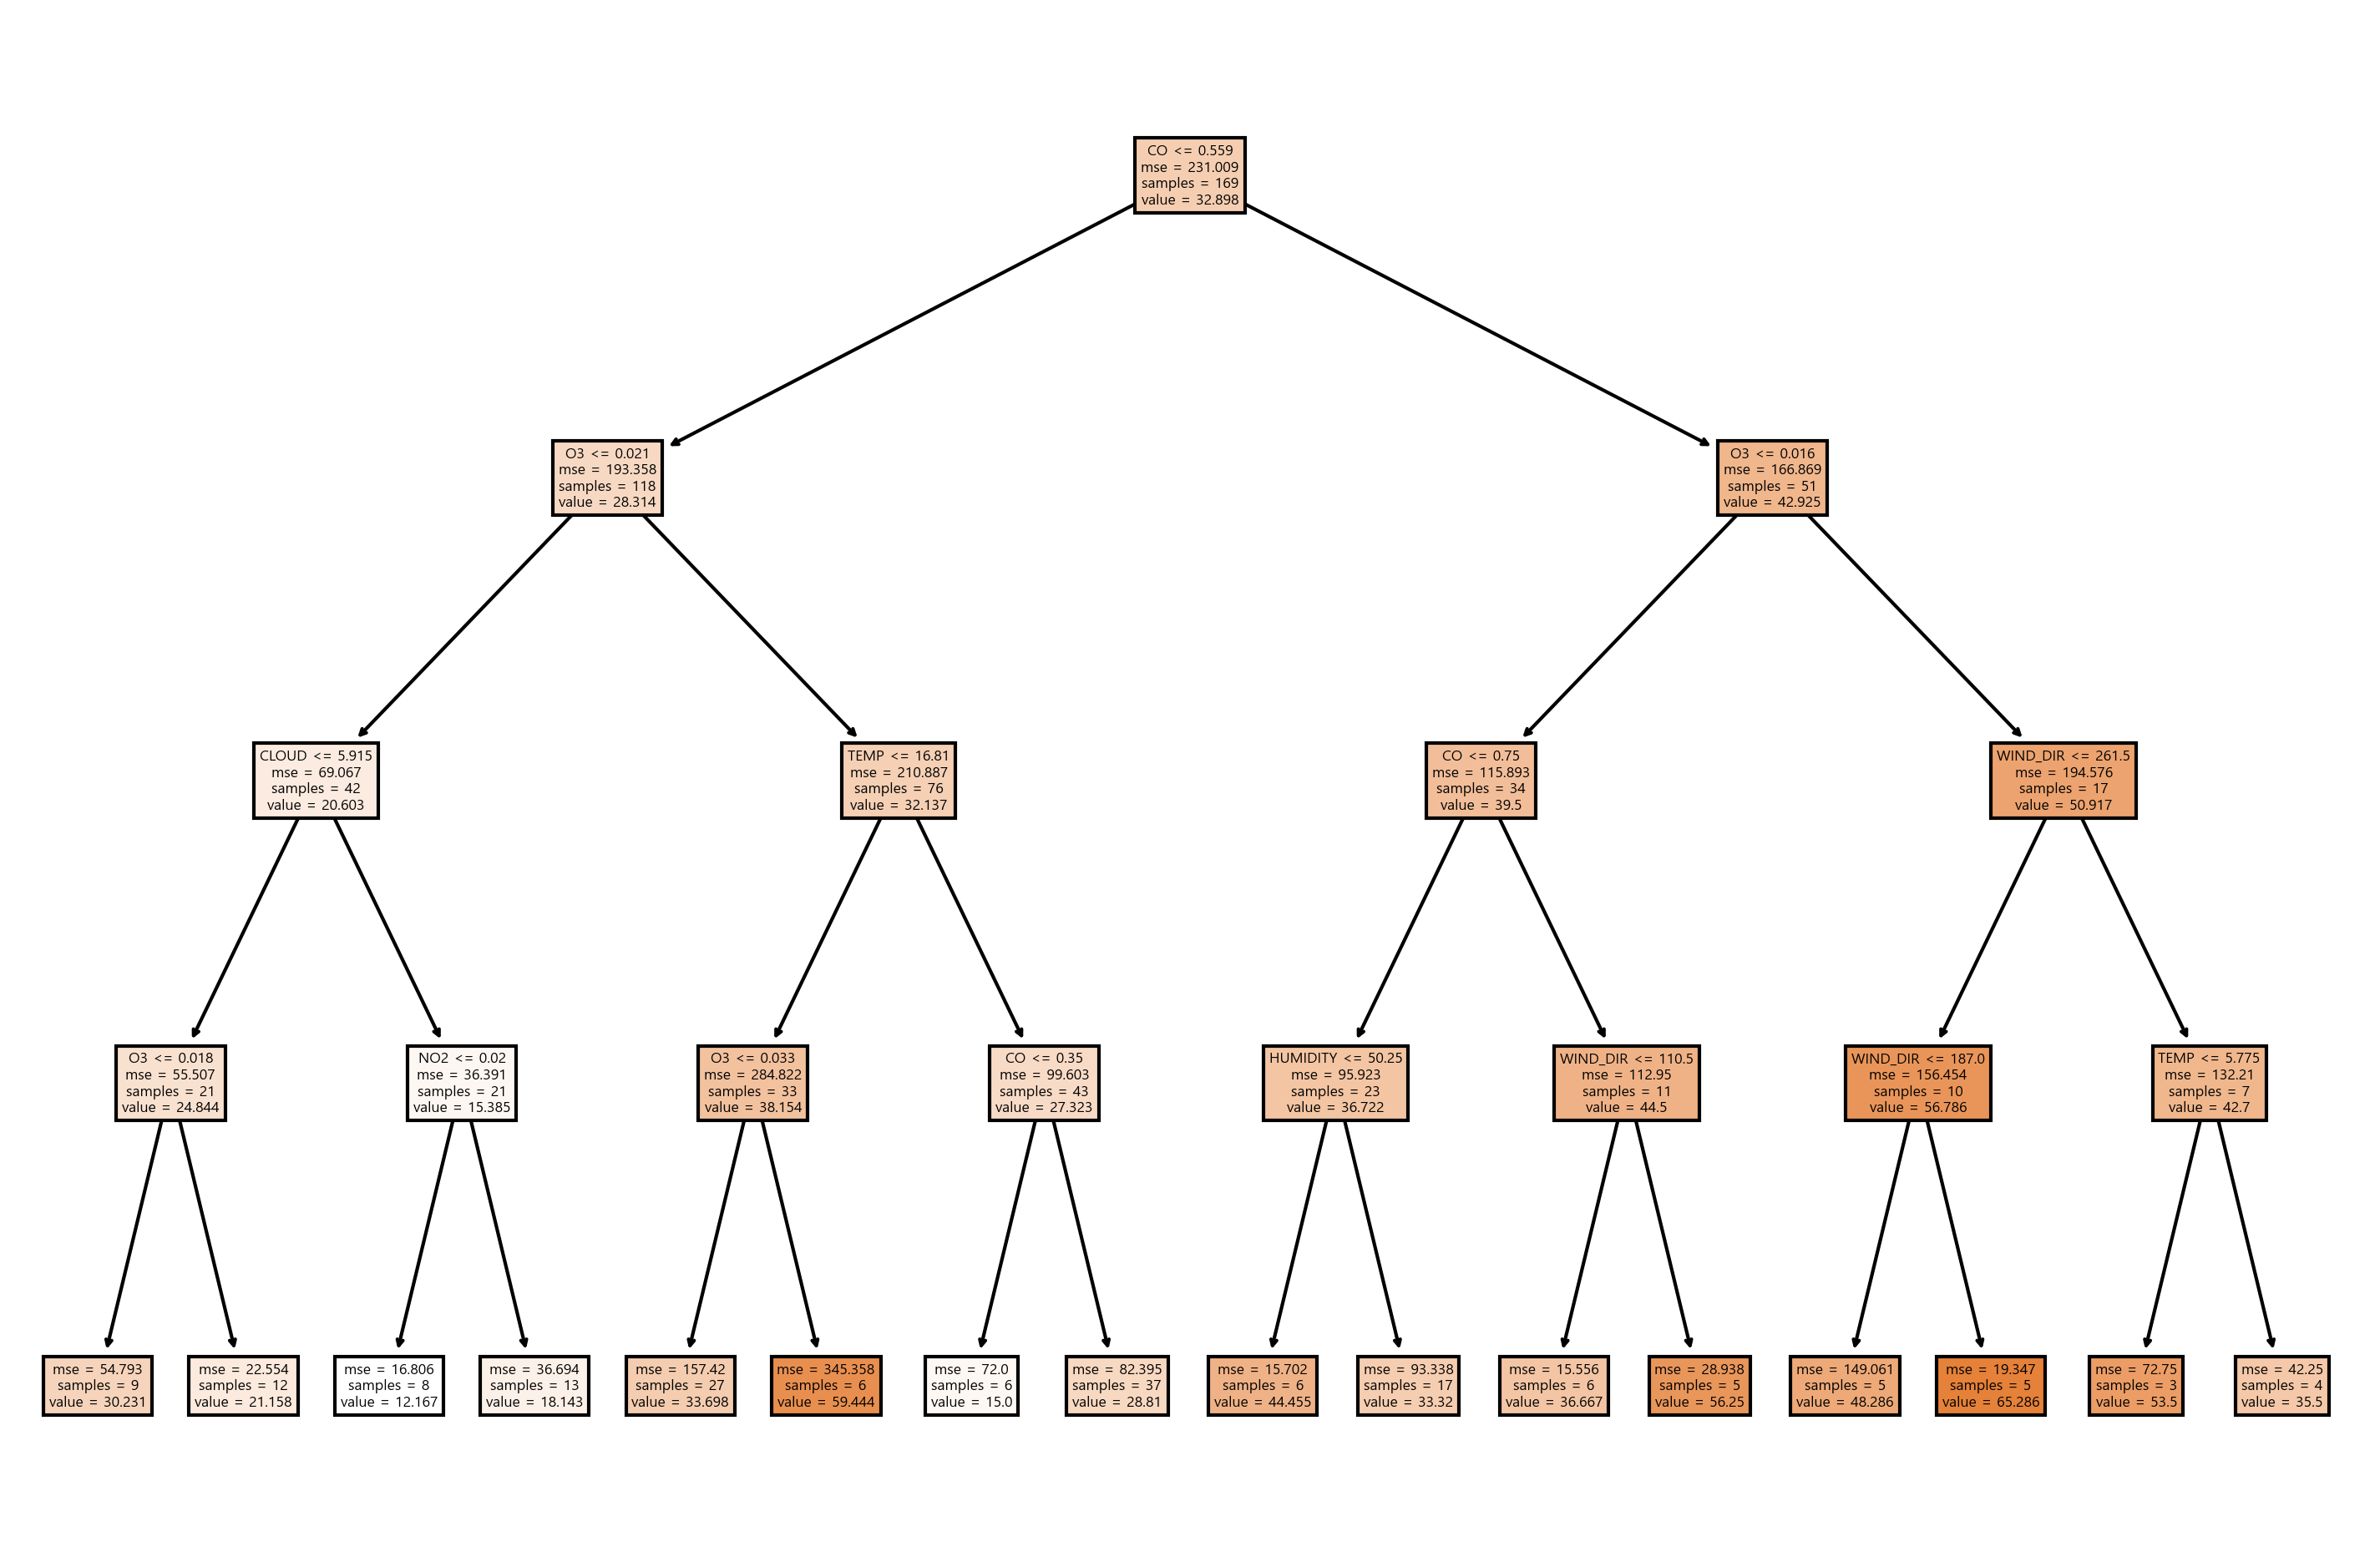

In [169]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
plot_tree(rf_final.estimators_[0], feature_names = v_feature_name, filled = True);
# # 1번 트리
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
# plot_tree(rf_final.estimators_[1], feature_names = v_feature_name, filled = True);
# # 10번 트리
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
# plot_tree(rf_final.estimators_[10], feature_names = v_feature_name, filled = True);

##### - feature_importances_ : 설명변수의 중요도

In [170]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,CO,0.443
0,O3,0.145
9,CLOUD,0.127
6,WIND_DIR,0.073
4,TEMP,0.058
1,NO2,0.037
8,ATM_PRESS,0.034
7,HUMIDITY,0.033
5,WIND,0.032
10,ISRAIN,0.006


Text(0, 0.5, '변수')

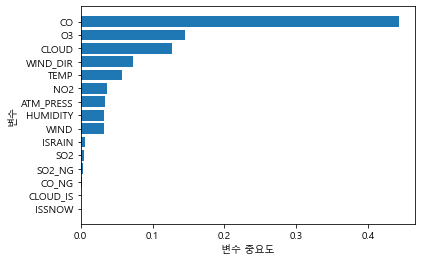

In [171]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

> 이 랜덤포레스트 모형을 만드는데 미세먼지 발생량에 크게 영향을 준 잠재 인자는 **CO, O3, CLOUD, WIND_DIR, TEMP, NO2 등**이 있다.

#### 그래디언트 부스팅

In [172]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (255, 15)
train data Y size : (255,)
test data X size : (110, 15)
test data Y size : (110,)


In [173]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.917
Score on test set : 0.504


> 기본 파라미터로 모델 생성 시 훈련 데이터에 대한 정확도가 높지만 테스트 데이터에 대한 정확도가 낮아 성능이 좋지 않고 일반화가 힘든 모델이라고 할 수 있다.

- n_estimators

In [174]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb =GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.475,0.408
1,20,0.658,0.498
2,30,0.742,0.528
3,40,0.793,0.546
4,50,0.830,0.535
5,60,0.858,0.533
6,70,0.877,0.522
7,80,0.896,0.512
8,90,0.904,0.511
9,100,0.917,0.504


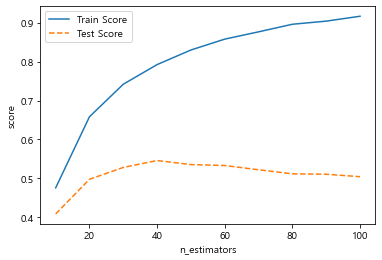

In [175]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label= "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

> 트리 수 증가에 따라 모델의 설명력이 향상하고 있으나 test 데이터의 성능 변화를 고려하여 40 선택

- min_samples_leaf

In [179]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators=40, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.793,0.546
1,2,0.789,0.529
2,3,0.792,0.527
3,4,0.783,0.515
4,5,0.782,0.518
5,6,0.772,0.532
6,7,0.774,0.511
7,8,0.755,0.536
8,9,0.762,0.527
9,10,0.754,0.528


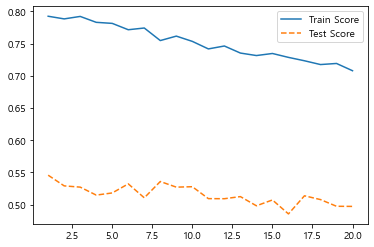

In [180]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label= "Test Score")
plt.legend()

> 잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며 test 데이터의 성능 변화를 고려하여 8 선택

- min_samples_split

In [183]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 40,  min_samples_leaf=8,
                                min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.755,0.536
1,4,0.755,0.536
2,6,0.755,0.536
3,8,0.755,0.536
4,10,0.755,0.536
5,12,0.755,0.536
6,14,0.755,0.536
7,16,0.755,0.536
8,18,0.754,0.531
9,20,0.767,0.517


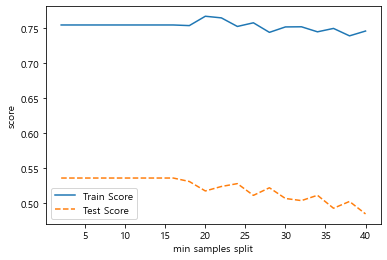

In [184]:
plt.plot(para_split, train_score, linestyle = "-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label= "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

> 분리 노드의 최소 자료수 증가에 따라 모델의 설명력은 감소하며 두 데이터의 성능 변화를 고려하여 16 선택

- max_depth

In [186]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators=40, min_samples_leaf=8,
                                min_samples_split = 16, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.401,0.374
1,2,0.630,0.498
2,3,0.755,0.536
3,4,0.845,0.494
4,5,0.897,0.498
5,6,0.925,0.492
6,7,0.934,0.474
7,8,0.942,0.456
8,9,0.948,0.474
9,10,0.950,0.490


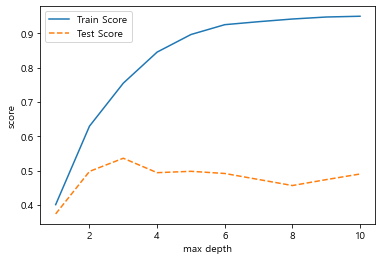

In [187]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

> 최대 깊이 증가에 따라 모델의 설명력은 증가하며 test 데이터의 성능 변화를 고려하여 3 선택

- learning_rate

In [189]:
train_score = []; test_score = []
para_lr = [lr*0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators=40, min_samples_leaf=8,
                                min_samples_split = 16, max_depth = 3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.755,0.536
1,0.2,0.865,0.471
2,0.3,0.912,0.488
3,0.4,0.946,0.432
4,0.5,0.952,0.401
5,0.6,0.979,0.426
6,0.7,0.978,0.348
7,0.8,0.986,0.272
8,0.9,0.987,0.206


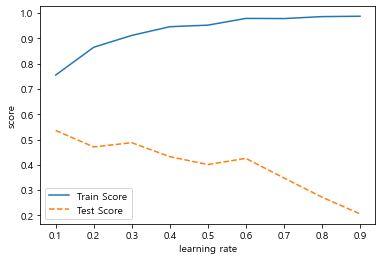

In [190]:
plt.plot(para_lr, train_score, linestyle="-", label="Train Score")
plt.plot(para_lr, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

> 학습률 증가에 따라 모델의 설명력은 증가하는데 test 데이터 성능이 급격하게 저하되므로 0.1 선택

- 최종 모델

In [192]:
gb_final = GradientBoostingRegressor(n_estimators=40, min_samples_leaf=8, min_samples_split=16,
                                  max_depth=3, learning_rate = 0.1, random_state = 1234)
gb_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 0.755
Score on test set : 0.536


In [193]:
# 변수명 저장
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,CO,0.420
0,O3,0.189
4,TEMP,0.109
9,CLOUD,0.084
6,WIND_DIR,0.063
7,HUMIDITY,0.044
5,WIND,0.035
8,ATM_PRESS,0.028
1,NO2,0.026
3,SO2,0.003


Text(0, 0.5, '변수')

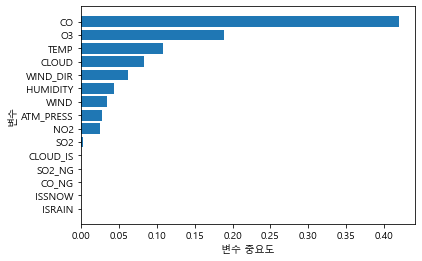

In [194]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

> 이 그래디언트 부스팅 모델을 생성하는데 목표변수인 미세먼지 발생량에 영향을 미치는 잠재인자는 **CO, O3, TEMP, CLOUD, WIND_DIR 등**이 있다.

## 6-1 변수 중요도가 높은 인자 확인

- 이 때까지 분석모델 생성을 통해 변수 중요도가 높은 공통인자를 정리해보자.

CO, O3, NO2, TEMP, ATM_PRESS, WIND_DIR, WIND  
CO, CLOUD, TEMP, O3, ATM_PRESS, WIND_DIR, NO2  
CO, O3, CLOUD, WIND_DIR, TEMP, NO2  
CO, O3, TEMP, CLOUD, WIND_DIR   

> 공통적으로 4개의 모델에서 3번 이상 중요도가 높은 인자로 선택된 **CO, O3, NO2, TEMP, WIND_DIR, CLOUD을 가지고 모델링 재실시**

## 7. 모델링 재실시

In [197]:
df_new_x = df_raw[["CO", "O3", "NO2", "TEMP", "WIND_DIR", "CLOUD"]]
df_new_x

,CO,O3,NO2,TEMP,WIND_DIR,CLOUD
0,0.5,0.054,0.021,24.03,249,5.70
1,0.5,0.053,0.020,24.29,265,3.83
2,0.4,0.042,0.023,24.18,280,6.29
3,0.4,0.034,0.026,25.35,263,2.54
4,0.5,0.045,0.035,27.30,175,3.92
...,...,...,...,...,...,...
361,0.4,0.039,0.016,21.66,228,8.73
362,0.4,0.044,0.017,23.94,217,6.21
363,0.4,0.044,0.009,25.03,283,2.63
364,0.6,0.026,0.028,24.06,103,7.58


### 다중선형회귀 모델

In [199]:
reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + TEMP + WIND_DIR + CLOUD", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     53.12
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           1.16e-46
Time:                        02:47:11   Log-Likelihood:                -1411.8
No. Observations:                 365   AIC:                             2838.
Df Residuals:                     358   BIC:                             2865.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.9491      5.043     -4.947      0.0

> 모델은 설명변수를 46.2% 설명할 수 있다.  
> 모든 설명변수는 유의한 변수인데 CLOUD는 유의하지 않다.

### 다중선형회귀 모델 - 규제화

In [201]:
train_score = []
para_alpha = [n_alpha * 0.1 for n_alpha in range(1,11)]

for v_alpha in para_alpha:
    lasso = Lasso(random_state=1234, alpha = v_alpha)
    lasso.fit(df_new_x, df_raw_y)
    train_score.append(lasso.score(df_new_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainScore"] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.361265
1,0.2,0.353481
2,0.3,0.340510
3,0.4,0.322350
4,0.5,0.299008
5,0.6,0.270472
6,0.7,0.236745
7,0.8,0.197833
8,0.9,0.153729
9,1.0,0.105069


In [203]:
lasso_final = Lasso(alpha=0.1, random_state = 1234)
result = lasso_final.fit(df_new_x, df_raw_y)

df_lasso = pd.DataFrame()
df_lasso["variable"] = df_new_x.columns
df_lasso["Coef"] = pd.DataFrame(result.coef_)
df_lasso

,variable,Coef
0,CO,59.578971
1,O3,0.000000
2,NO2,0.000000
3,TEMP,-0.133486
4,WIND_DIR,0.033663
5,CLOUD,-0.624090


> 높은 해석력을 지닌 LASSO 회귀를 통해 모델링을 해보았더니 중요 인자였던 O3, NO2가 아무런 의미가 없어졌다. 

### 의사결정트리

In [204]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_new_x, df_raw_y
                                                                , test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (255, 6)
train data Y size : (255,)
test data X size : (110, 6)
test data Y size : (110,)


In [205]:
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]
para_split = [n_split * 2 for n_split in range(2, 20)]
para_depth = [depth for depth in range(1, 11)]

# GridSearchCV를 이용한 최적 parameter 찾기
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],
              "max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))


best estimator model: 
DecisionTreeRegressor(criterion='mae', max_depth=5, max_features='auto',
                      min_samples_leaf=7, min_samples_split=28)

best parameter: 
{'criterion': 'mae', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 28}

best score: 
0.412


In [206]:
tree_final = DecisionTreeRegressor(min_samples_leaf=7, min_samples_split=28,
                                  max_depth=5, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)
print("Score on training set : {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set : 0.566
Score on test set : 0.360


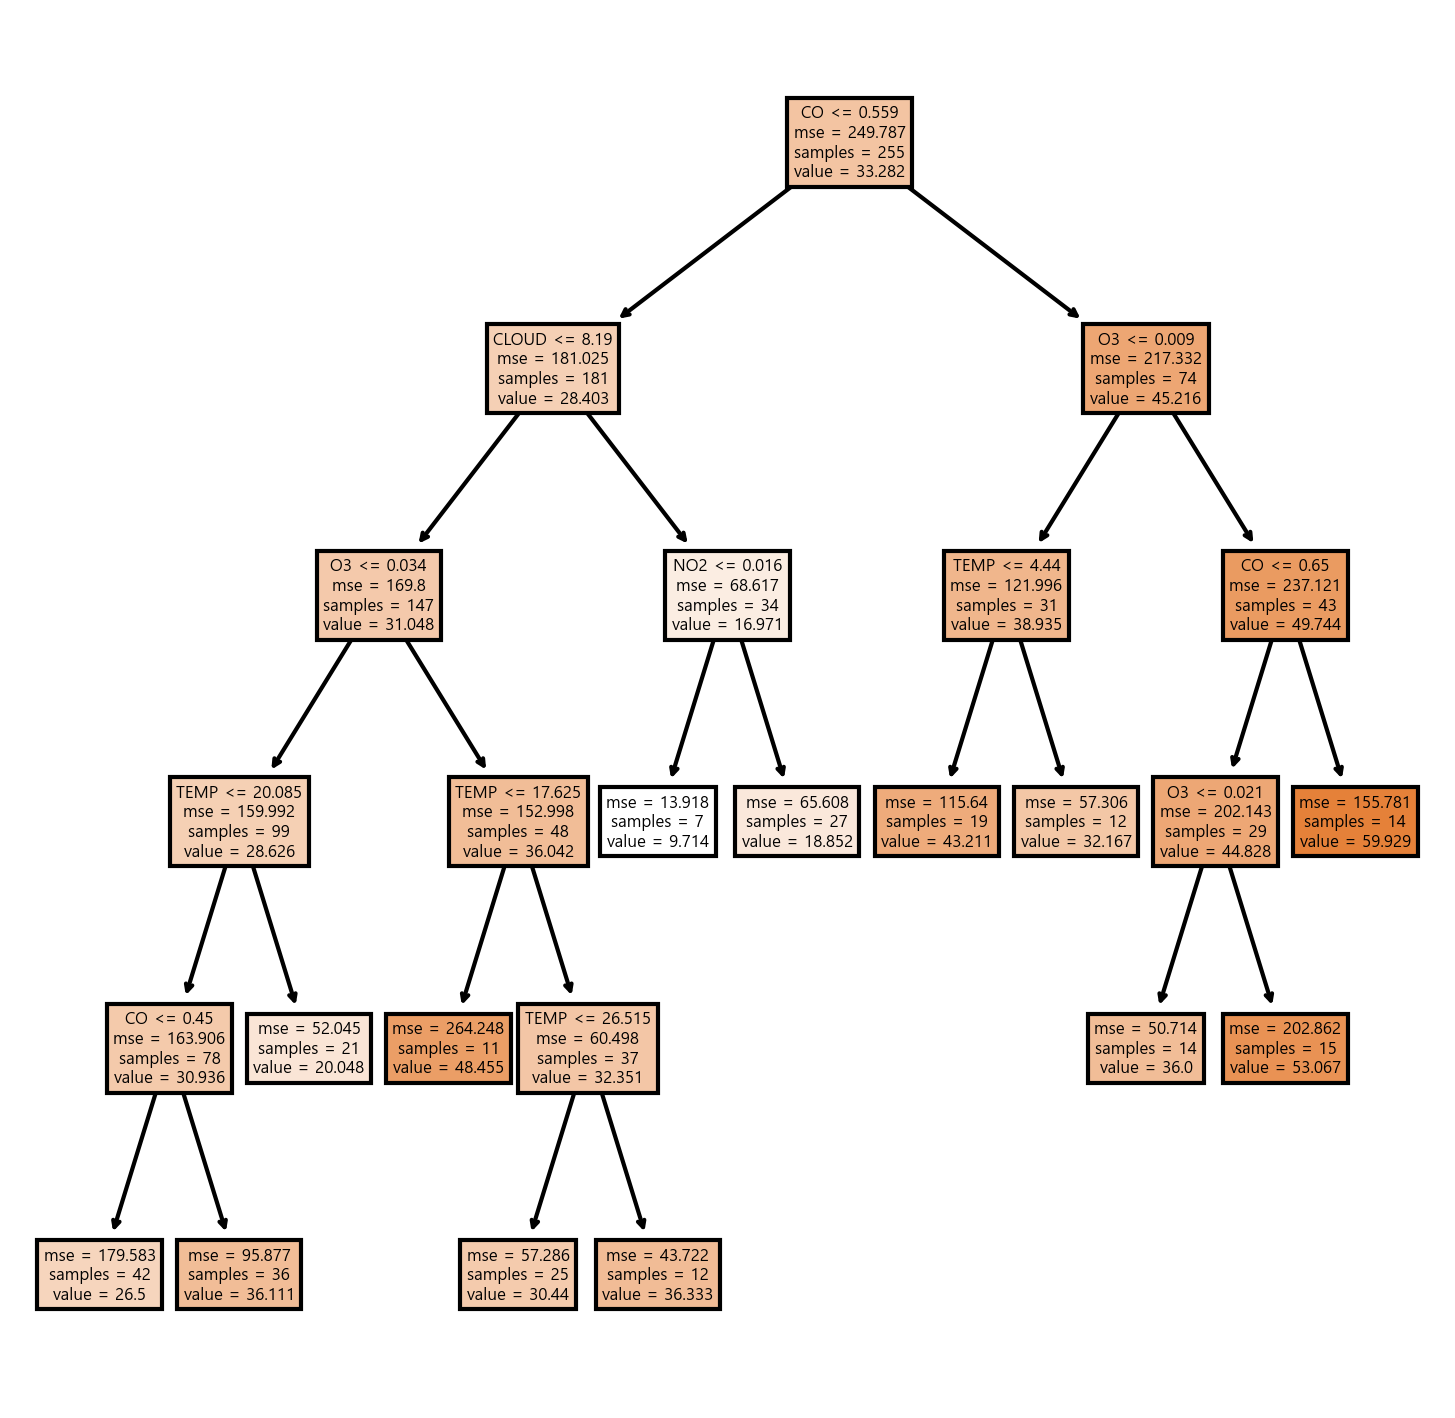

In [207]:
# 최종 모델 시각화
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6, 6), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

### 랜덤 포레스트

In [208]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_new_x, df_raw_y
                                                                , test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (255, 6)
train data Y size : (255,)
test data X size : (110, 6)
test data Y size : (110,)


In [209]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.922
Score on test set : 0.528


In [210]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf =RandomForestRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.887,0.521
1,20,0.898,0.513
2,30,0.905,0.515
3,40,0.909,0.532
4,50,0.914,0.524
5,60,0.919,0.523
6,70,0.922,0.527
7,80,0.922,0.528
8,90,0.922,0.529
9,100,0.922,0.528


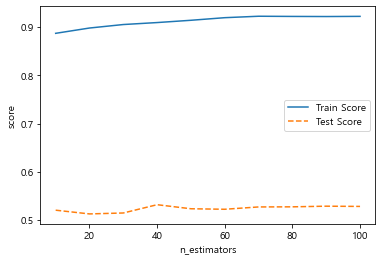

In [211]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label= "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [212]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234, n_estimators=40, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.909,0.532
1,2,0.847,0.522
2,3,0.795,0.503
3,4,0.755,0.489
4,5,0.721,0.480
5,6,0.694,0.476
6,7,0.663,0.457
7,8,0.638,0.455
8,9,0.622,0.449
9,10,0.604,0.432


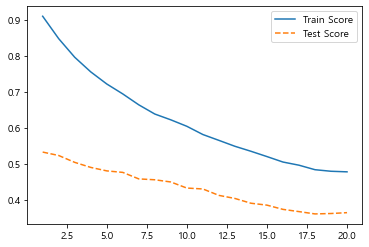

In [213]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label= "Test Score")
plt.legend()

In [214]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state = 1234, n_estimators = 40,  min_samples_leaf=6,
                                min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.694,0.476
1,6,0.694,0.476
2,8,0.694,0.476
3,10,0.694,0.476
4,12,0.694,0.476
5,14,0.679,0.467
6,16,0.660,0.465
7,18,0.646,0.462
8,20,0.632,0.456
9,22,0.622,0.450


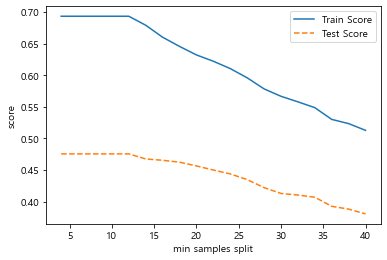

In [215]:
plt.plot(para_split, train_score, linestyle = "-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label= "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [216]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234, n_estimators=40, min_samples_leaf=6,
                                min_samples_split = 12, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.245,0.334
1,2,0.394,0.339
2,3,0.502,0.423
3,4,0.591,0.463
4,5,0.645,0.473
5,6,0.672,0.476
6,7,0.686,0.473
7,8,0.692,0.477
8,9,0.693,0.476
9,10,0.694,0.476


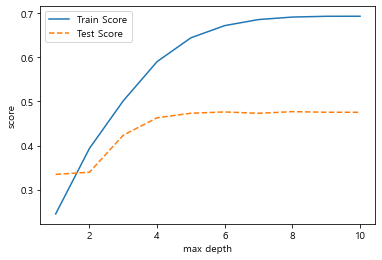

In [217]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [218]:
rf_final = RandomForestRegressor(n_estimators=40, min_samples_leaf=6, min_samples_split=12,
                                  max_depth=4, random_state = 1234)
rf_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.591
Score on test set : 0.463


### 그래디언트 부스팅

In [219]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb =GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.471,0.402
1,20,0.640,0.494
2,30,0.713,0.524
3,40,0.761,0.538
4,50,0.794,0.546
5,60,0.820,0.546
6,70,0.846,0.540
7,80,0.861,0.543
8,90,0.878,0.546
9,100,0.889,0.547


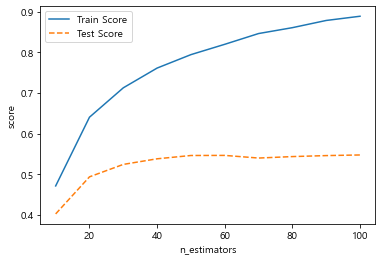

In [220]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label= "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [221]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators=50, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.794,0.546
1,2,0.782,0.539
2,3,0.772,0.542
3,4,0.772,0.523
4,5,0.772,0.515
5,6,0.767,0.522
6,7,0.762,0.524
7,8,0.764,0.521
8,9,0.761,0.526
9,10,0.751,0.508


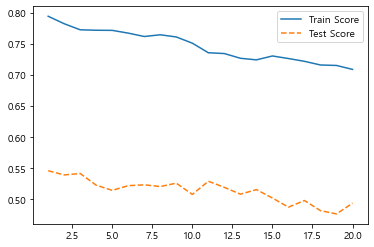

In [222]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label= "Test Score")
plt.legend()

In [223]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 50,  min_samples_leaf=5,
                                min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.772,0.515
1,4,0.772,0.515
2,6,0.772,0.515
3,8,0.772,0.515
4,10,0.772,0.515
5,12,0.772,0.507
6,14,0.771,0.537
7,16,0.762,0.533
8,18,0.767,0.525
9,20,0.756,0.517


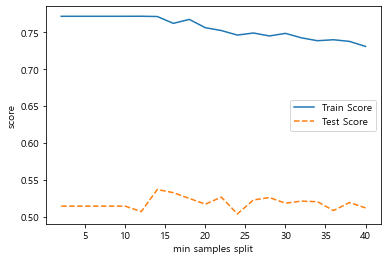

In [224]:
plt.plot(para_split, train_score, linestyle = "-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label= "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [225]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators=50, min_samples_leaf=5,
                                min_samples_split = 14, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.435,0.398
1,2,0.648,0.499
2,3,0.771,0.537
3,4,0.843,0.499
4,5,0.895,0.542
5,6,0.922,0.564
6,7,0.953,0.558
7,8,0.958,0.566
8,9,0.963,0.572
9,10,0.966,0.564


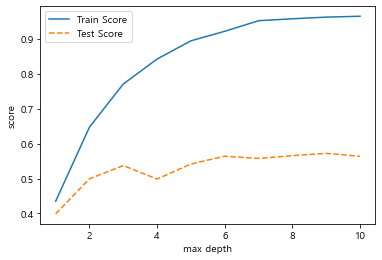

In [226]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [227]:
train_score = []; test_score = []
para_lr = [lr*0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators=50, min_samples_leaf=5,
                                min_samples_split = 14, max_depth = 3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.771,0.537
1,0.2,0.860,0.527
2,0.3,0.902,0.506
3,0.4,0.925,0.556
4,0.5,0.964,0.469
5,0.6,0.969,0.427
6,0.7,0.977,0.389
7,0.8,0.980,0.408
8,0.9,0.985,0.330


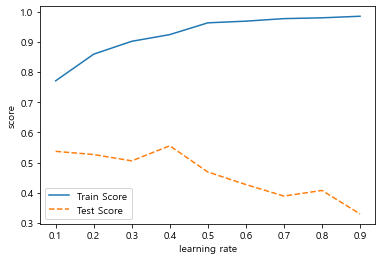

In [228]:
plt.plot(para_lr, train_score, linestyle="-", label="Train Score")
plt.plot(para_lr, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

In [229]:
gb_final = GradientBoostingRegressor(n_estimators=50, min_samples_leaf=5, min_samples_split=14,
                                  max_depth=3, learning_rate = 0.1, random_state = 1234)
gb_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 0.771
Score on test set : 0.537


## 8. 모델 선정

- 현업 적용 가능성 판단

> 다중회귀분석 : 모델은 설명변수를 46.2% 설명할 수 있다. 모든 설명변수는 유의한 변수인데 CLOUD는 유의하지 않다.  
  
> 회귀분석 - 규제화 : 높은 해석력을 지닌 LASSO 회귀를 통해 모델링을 해보았더니 중요 인자였던 O3, NO2가 아무런 의미가 없어졌다.  
  
> 의사결정나무 정확도  
Score on training set : 0.566  
Score on test set : 0.360  
  
> 랜덤 포레스트 정확도  
Score on training set : 0.591  
Score on test set : 0.463  

> 그래디언트 부스팅 정확도  
Score on training set : 0.771  
Score on test set : 0.537  

> **다섯 모델의 정확도와 성능을 비교해보았더니, 회귀분석의 경우 중요변수에 대한 의미가 사라져버려 모델로서 의미가 없다고 판단했다. 그리고 정확도 비교를 해본 결과 그래디언트 부스팅 모델이 가장 적합하다고 결론을 내렸다. 하지만 현업 적용 가능성이라고 한다면, 그래디언트 부스팅 모델을 생성했을 때 훈련 데이터에 대해 77.1% 정확도를 가지고 테스트 데이터에 대해 53.7%의 정확도를 가지므로 과소적합한, 미세먼지 PM10에 대해 유의한 설명변수들을 반영하여 설명할 수 있는 모델이 생성되지 않았다. 따라서 현업에 적용하기에 힘들다고 판단한다. 과소적합한 모델이므로 모델이 학습할 수 있는 많은 데이터가 필요하다.**

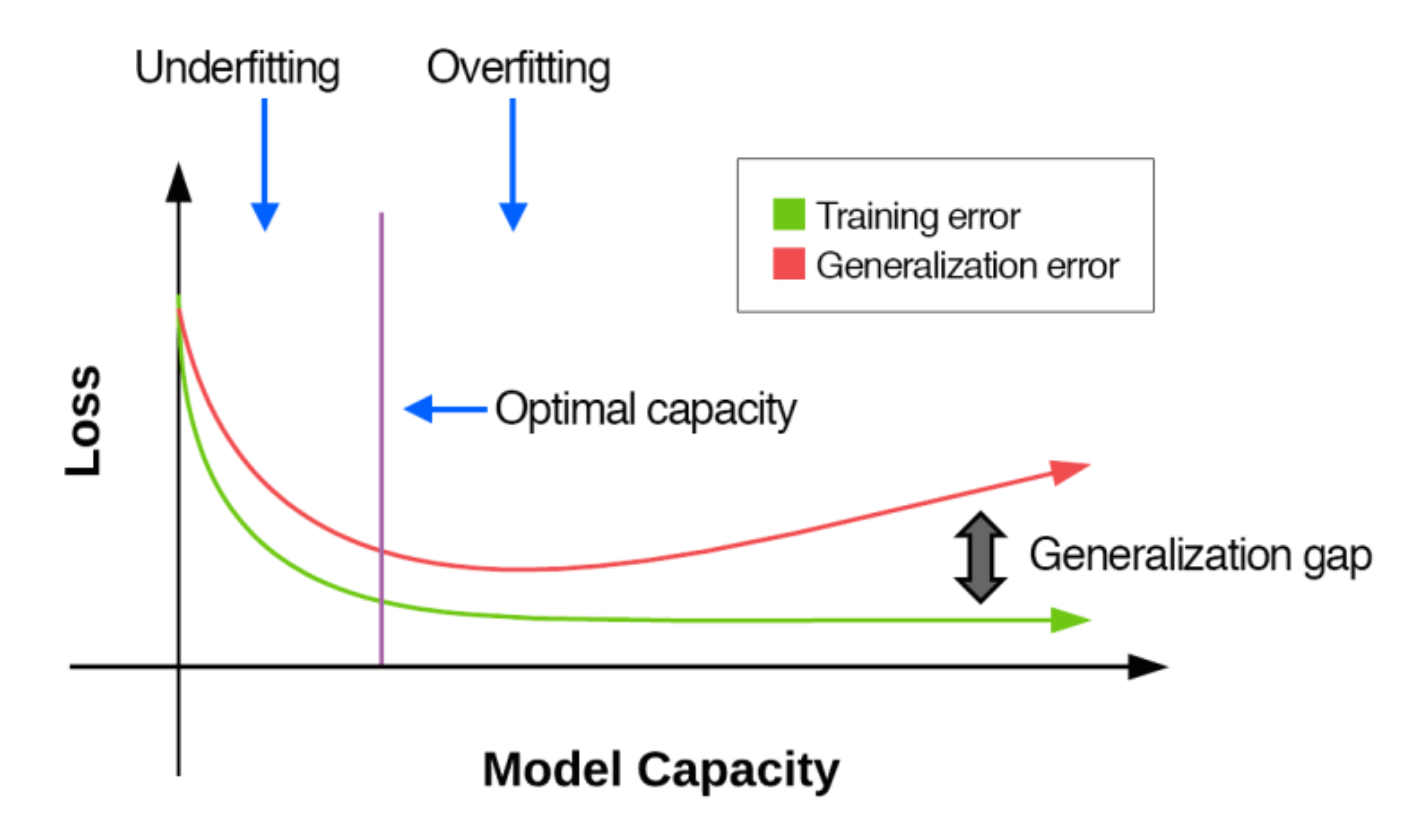